/Users/Zhonghou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/Users/Zhonghou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/Users/Zhonghou/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Weights: [-1.17796112  1.03926518 -5.        ]


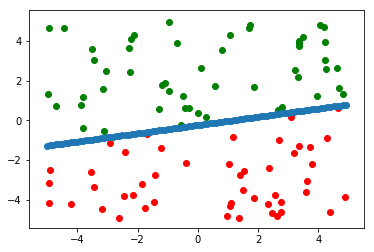

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution as de

def sigmoid (x):
    ''' Returns sigmoid(x) with scale = 20.'''
    
    return 1 / (1+np.exp (-20*x))

def logit (x):
    ''' Returns the inverse sigmoid of x.'''
    
    return np.log (x / (1-x))

def phi (weights, x):
    ''' Combines the features according to a simple dot product with the weights.'''
    
    return np.dot (x, weights)

def log_likelihood (weights, X0, X1):
    ''' Computes the log likelihood given the weights, the data sets X0 (corresponding to class 0)
    and X1 (corresponding to class 1).'''
    
    total  = 0
    for x0 in X0:
        total += np.log (sigmoid (phi (weights, x0)))
    for x1 in X1:
        total += np.log (1 - sigmoid (phi (weights, x1)))
    return total

def sample_points (num_points, num_predictors, start, end):
    ''' Samples features from a uniform distribution on [start, end]. Appends a bias
    of 1 at the beginning of each feature set.'''
    
    X = []
    for point_num in range (num_points):
        point = [1]
        for predictor_num in range (num_predictors):
            value = np.random.uniform (start, end)
            point.append (value)
        X.append (point)
    return X

def separate_classes (weights, X):
    ''' Separates the features into class 0 or class 1, based on a nonlinear activation function.'''
    
    X0, X1 = [], []
    for x in X:
        if phi (weights, x) < 0:
            X0.append (x)
        else:
            X1.append (x)
    return np.array(X0), np.array(X1)

def scatter (X, option):
    ''' Creates a scatter plot from the second and third columns of X.'''
    x1 = [row[1] for row in X]
    x2 = [row[2] for row in X]
    plt.scatter (x1, x2, c=option)
    
def plot_division_line (weights, start, end):
    ''' Plots a line which divides the classes based on the value of the
    weights which maximizes the log likelihood function.'''
    
    x_test = np.arange (start, end, .1)
    y_test = [1/weights[2]*(-weights[0] - weights[1]*x) for x in x_test]
    plt.scatter (x_test, y_test)
    

def main():
    '''Samples from two uniform distributions 100 times. Separates the data points in X according
    to the target weights and the activation function given in separate_classes. Uses logistic
    regression to estimate the target weights. Plots the class 0 points in red, the class 1
    points in green, and the division line given by the weight estimates.'''
    
    X = sample_points (100, 2, -5, 5)
    target_weights = [1,-1,5]
    X0, X1 = separate_classes (target_weights, X)
    def f(weights):
        return -log_likelihood (weights, X0, X1)
    weights = de(f, [(-5,5), (-5, 5), (-5,5)]).x
    scatter (X0, 'red')
    scatter (X1, 'green')
    plot_division_line (weights, -5, 5)
    print ('Weights:', weights)
    
    
    
    
    

main()